In [2]:
import pandas as pd
import math

In [23]:
retail_df=pd.read_excel('../data/Online_Retail.xlsx')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [44]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [45]:
#데이터프레임에 대한 전체 정보
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
 8   SaleAmount   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB


In [48]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
SaleAmount     0
dtype: int64

In [49]:
(retail_df["Quantity"]==0).sum()


np.int64(0)

In [50]:
retail_df=retail_df[retail_df["Quantity"]>0]
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df=retail_df[retail_df['CustomerID'].notnull()]
retail_df['CustomerID']=retail_df['CustomerID'].astype(int)

In [68]:
retail_df['CustomerID']

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 392692, dtype: int64

In [51]:
retail_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
 8   SaleAmount   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB


In [67]:
retail_df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
SaleAmount     0
dtype: int64

In [53]:
retail_df.shape


(397884, 9)

In [54]:
retail_df.drop_duplicates(inplace=True)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
 8   SaleAmount   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


In [56]:
retail_df['StockCode'].value_counts()


StockCode
85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
          ... 
90059A       1
20678        1
90059D       1
90168        1
23843        1
Name: count, Length: 3665, dtype: int64

In [57]:
# 제품수, 거래건수, 고객수
df1=pd.DataFrame([{'Product':len(retail_df['StockCode'].value_counts()),
              'Transaction':len(retail_df['InvoiceNo'].value_counts()),
              'Customer':len(retail_df['CustomerID'].value_counts())}],
              columns=['Product', 'Transaction','Customer'], index=['counts'])
df1

,Product,Transaction,Customer
counts,3665,18532,4338


In [58]:
len(retail_df['StockCode'].value_counts())


3665

In [59]:
retail_df['Country'].value_counts()


Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [60]:
# 구매금액=단가*수량
retail_df['SaleAmount']=retail_df['UnitPrice']*retail_df['Quantity']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [61]:
# 마케팅에 이용하기 위한 고객의 주문횟수, 주문총액, 마지막 주문 후 경과일
aggregations={'InvoiceNo':'count', 'SaleAmount':'sum', 'InvoiceDate':'max'}
customer_df=retail_df.groupby('CustomerID').agg(aggregations)
customer_df=customer_df.reset_index()
customer_df


,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00
...,...,...,...,...
4333,18280,10,180.60,2011-03-07 09:52:00
4334,18281,7,80.82,2011-06-12 10:53:00
4335,18282,12,178.05,2011-12-02 11:43:00
4336,18283,721,2045.53,2011-12-06 12:02:00


In [62]:
customer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   4338 non-null   int64         
 1   InvoiceNo    4338 non-null   int64         
 2   SaleAmount   4338 non-null   float64       
 3   InvoiceDate  4338 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 135.7 KB


In [63]:
customer_df=customer_df.rename(columns={'InvoiceNo':'Freq',
                                        'InvoiceDate':'ElapsedDays'})
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [64]:
import datetime
customer_df['ElapsedDays']=datetime.datetime(2011,12,31)-customer_df['ElapsedDays']
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,346 days 13:59:00
1,12347,182,4310.00,23 days 08:08:00
2,12348,31,1797.24,96 days 10:47:00
3,12349,73,1757.55,39 days 14:09:00
4,12350,17,334.40,331 days 07:59:00


In [65]:
customer_df['ElapsedDays']=customer_df['ElapsedDays'].apply(lambda x: x.days+1)
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,347
1,12347,182,4310.00,24
2,12348,31,1797.24,97
3,12349,73,1757.55,40
4,12350,17,334.40,332


In [78]:
! pip install seaborn

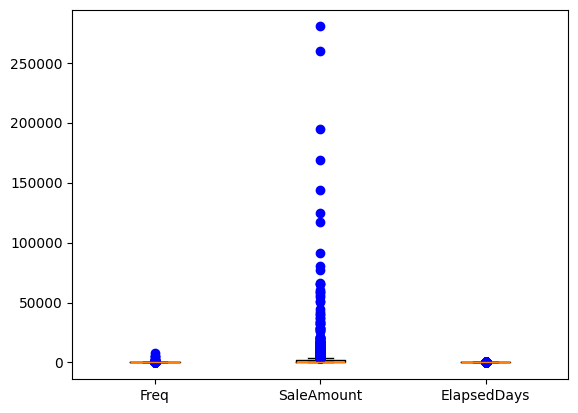

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax=plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'], 
            customer_df['ElapsedDays']],sym='bo')
plt.xticks([1,2,3],['Freq','SaleAmount','ElapsedDays'])
plt.show()


In [80]:
import numpy as np
customer_df['Freq_log']=np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log']=np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log']=np.log1p(customer_df['ElapsedDays'])
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,347,0.693147,11.253955,5.852202
1,12347,182,4310.00,24,5.209486,8.368925,3.218876
2,12348,31,1797.24,97,3.465736,7.494564,4.584967
3,12349,73,1757.55,40,4.304065,7.472245,3.713572
4,12350,17,334.40,332,2.890372,5.815324,5.808142


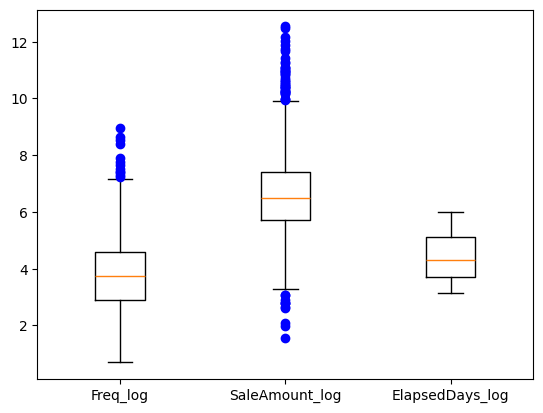

In [81]:
fig, ax=plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'], 
customer_df['ElapsedDays_log']],
sym='bo')
plt.xticks([1,2,3],['Freq_log','SaleAmount_log','ElapsedDays_log'])
plt.show()

In [82]:
# K평균 군집화 모델 구축
# x_features를 정규분포로 스케일링 하기

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [84]:
x_features=customer_df[['Freq_log', 'SaleAmount_log','ElapsedDays_log']].values
x_features

array([[ 0.69314718, 11.25395523,  5.85220248],
       [ 5.20948615,  8.36892517,  3.21887582],
       [ 3.4657359 ,  7.49456369,  4.58496748],
       ...,
       [ 2.56494936,  5.1876651 ,  3.40119738],
       [ 6.58202514,  7.62390095,  3.25809654],
       [ 4.26267988,  7.51658563,  4.17438727]])

In [85]:
from sklearn.preprocessing import StandardScaler
x_features_scaled=StandardScaler().fit_transform(x_features)
x_features_scaled

array([[-2.43820181,  3.7077163 ,  1.75491769],
       [ 1.18898578,  1.41490344, -1.41929401],
       [-0.21146474,  0.72002428,  0.22739274],
       ...,
       [-0.9349095 , -1.11333158, -1.19952363],
       [ 2.29130702,  0.82281217, -1.37201737],
       [ 0.42858139,  0.73752572, -0.26752061]])

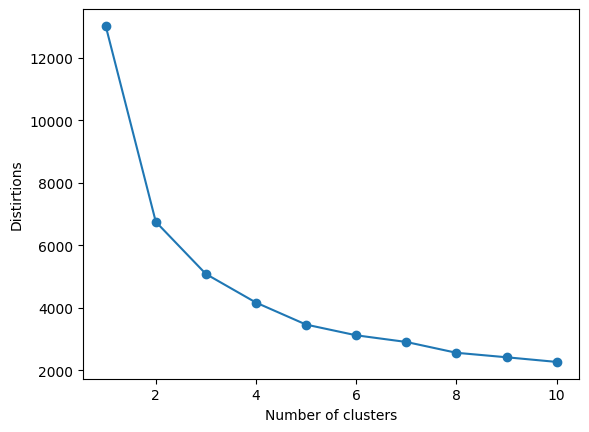

In [86]:
distortions=[]
for i in range(1, 11):
    kmeans_i=KMeans(n_clusters=i, random_state=0)
    kmeans_i.fit(x_features_scaled)
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distirtions')
plt.show()

In [87]:
kmeans=KMeans(n_clusters=3, random_state=0)
y_label=kmeans.fit_predict(x_features_scaled)
customer_df['ClusterLabel']=y_label
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,347,0.693147,11.253955,5.852202,0
1,12347,182,4310.00,24,5.209486,8.368925,3.218876,1
2,12348,31,1797.24,97,3.465736,7.494564,4.584967,2
3,12349,73,1757.55,40,4.304065,7.472245,3.713572,1
4,12350,17,334.40,332,2.890372,5.815324,5.808142,0


In [88]:
from matplotlib import cm

def silhouetteViz(n_cluster, x_features):
    kmeans=KMeans(n_clusters=n_cluster, random_state=0)
    y_labels=kmeans.fit_predict(x_features)

    silhouette_values=silhouette_samples(x_features, y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper=0,0
    y_ticks=[]

    for c in range(n_cluster):
        c_silhouettes=silhouette_values[y_label==c]
        c_silhouettes.sort()
        y_ax_upper+=len(c_silhouettes)
        color=cm.jet(float(c)/n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height=1.0, 
                 edgecolor='none', color=color)
        y_ticks.append((y_ax_lower+y_ax_upper)/2.)
        y_ax_lower+=len(c_silhouettes)
    
    silhouette_avg=np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle="--")
    plt.title("Number of Cluster:"+str(n_cluster)+"\n"
              +'silhoutte score:'+str(round(silhouette_avg, 3)))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.yticks(y_ticks, range(n_cluster))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

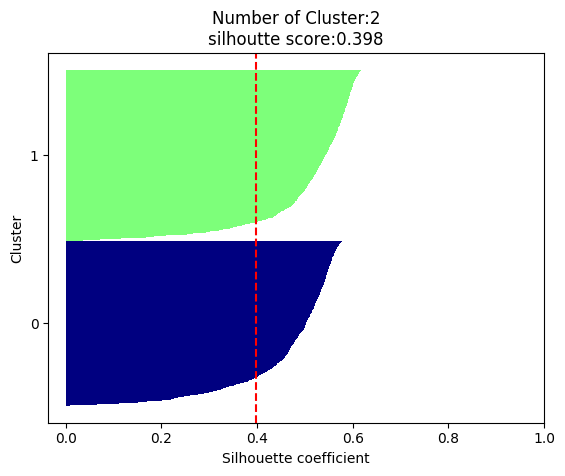

In [89]:
silhouetteViz(2, x_features_scaled)


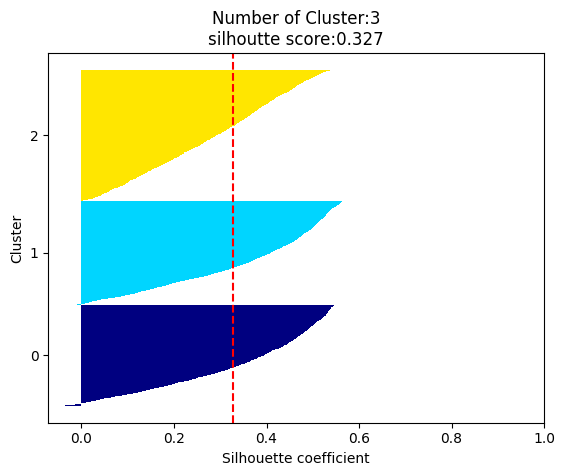

In [90]:
silhouetteViz(3, x_features_scaled)


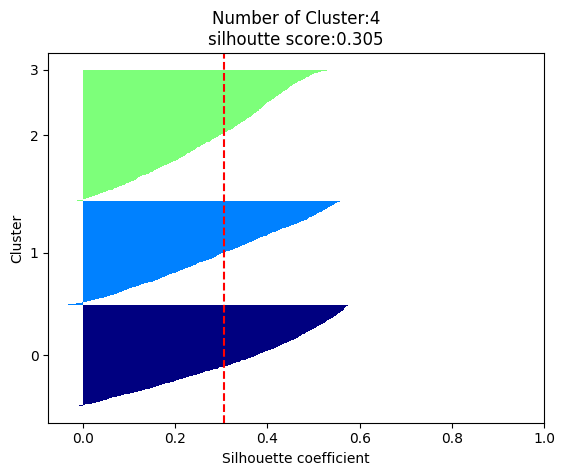

In [91]:
silhouetteViz(4, x_features_scaled)


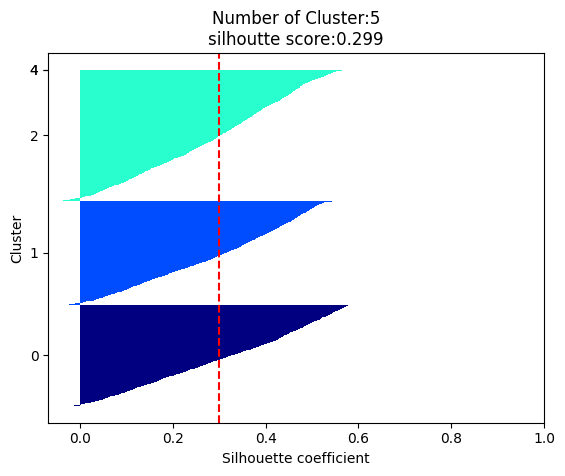

In [92]:
silhouetteViz(5, x_features_scaled)


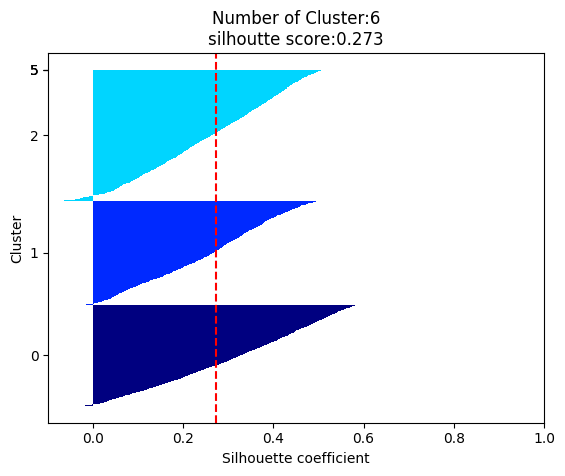

In [93]:
silhouetteViz(6, x_features_scaled)


In [94]:
def clusterScatter(n_cluster, x_features):
    c_colors=[]
    kmeans=KMeans(n_clusters=n_cluster, random_state=0)
    y_labels=kmeans.fit_predict(x_features)

   #클러스터의 데이터 분포를 원으로 그림
    for i in range(n_cluster):
          c_color=cm.jet(float(i)/n_cluster)
          c_colors.append(c_color)
          plt.scatter(x_features[y_labels==i, 0], x_features[y_labels==i,1], 
                      marker='o',color=c_color, edgecolor='black', s=50, 
                      label='cluster'+str(i))

    # 각 클러스터의 중심점을 삼각형으로 그림
    for i in range(n_cluster):
          plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
    plt.legend()
    plt.grid()
    plt.show()

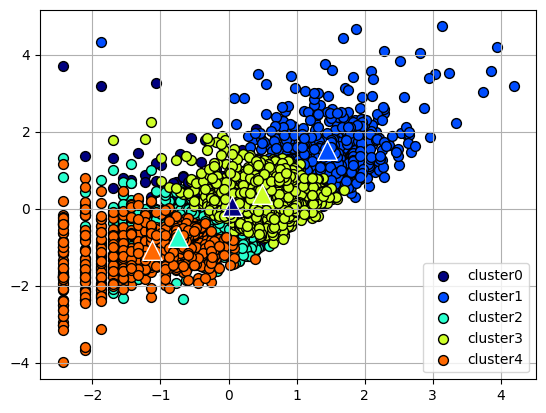

In [95]:
clusterScatter(5, x_features_scaled)


In [96]:
customer_df.head()


,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,347,0.693147,11.253955,5.852202,0
1,12347,182,4310.00,24,5.209486,8.368925,3.218876,1
2,12348,31,1797.24,97,3.465736,7.494564,4.584967,2
3,12349,73,1757.55,40,4.304065,7.472245,3.713572,1
4,12350,17,334.40,332,2.890372,5.815324,5.808142,0


In [97]:
# cluster 별 특징
group_customer=customer_df.groupby('ClusterLabel').agg({'Freq':'mean', 
'SaleAmount':'mean', 'ElapsedDays':'mean'})
group_customer

,Freq,SaleAmount,ElapsedDays
ClusterLabel,,,
0,20.931748,437.247101,239.519939
1,221.855234,5345.401330,52.443950
2,39.453468,661.993529,66.279787
